In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
from config import gkey

gmaps.configure(api_key=gkey)

In [32]:
structure_loss = pd.read_csv ('Fire.csv')
structure_loss.head()

In [33]:
structure_loss["STRUCTURE TYPE"].count()

In [34]:
structure_loss["STRUCTURE TYPE"].value_counts

In [35]:
#unique structures included in the data set
unique_structure_df = structure_loss["STRUCTURE TYPE"].unique()

unique_structure_df

In [36]:
#average percent loss by structure type
avg_loss_structure = structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

avg_loss_structure

In [37]:
#clean up structure types to consolidate "like" or "same" names
cleaned_structure_loss = structure_loss.replace({
     "APARTMENT":"APARTMENT",
     "APARTMENTS":"APARTMENT",     
     "APARTMENTS (ROOF TOP)":"APARTMENT",      
    
     "COMMERCIAL":"COMMERCIAL",                
     "COMMERICAL":"COMMERCIAL",                  
     "COMMERICAL/WAREHOUSE": "COMMERCIAL",
     
     "CONDO": "CONDOMINIUM",                   
     "CONDOMINIUM": "CONDOMINIUM",                    
     "CONDOMINIUMS": "CONDOMINIUM",
     "CONDOMINUM": "CONDOMINIUM",
     
     "DWELLING": "DWELLING",                               
     "DWELLING (WINDOW)": "DWELLING", 
    
     "4 PLEX": "FOURPLEX",
    
     "MANUFACTURE":"MANUFACTURE",                               
     "MANUFACTURING": "MANUFACTURE",
    
     "PORTABLE BLDG":"PORTABLE BUILDING",
    
     "HOTEL": "LODGING",
     "MOTEL": "LODGING"
     
    })
cleaned_structure_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


***Total Number of Unique Structure Types***

In [38]:
#total number of structures for structure type, grouped by percentage loss
avg_loss_structure = cleaned_structure_loss.groupby(["STRUCTURE TYPE"]).count()["PERCENTAGE LOSS"]

avg_loss_structure

STRUCTURE TYPE
APARTMENT            193
CARPORT                1
CHURCH                 2
COMMERCIAL            68
CONDOMINIUM           12
DUPLEX                 3
DWELLING             274
FOURPLEX               1
GARAGE                12
LAUNDRY ROOM           1
LODGING               12
MANUFACTURE            2
MOBILE HOME            3
OFFICE                 3
PORTABLE BUILDING      1
RESTAURANT             5
RETAIL                 1
SCHOOL                 3
SHED                  13
SHOPPING MALL          1
TOWNHOME               2
WAREHOUSE              8
Name: PERCENTAGE LOSS, dtype: int64

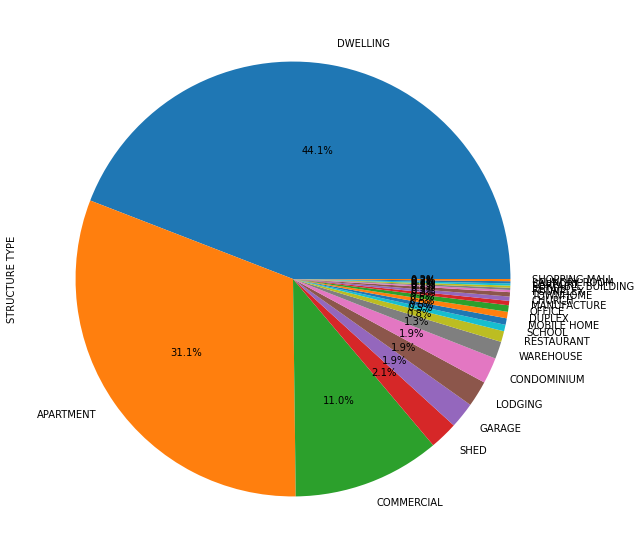

In [39]:
structure_type = cleaned_structure_loss['STRUCTURE TYPE'].value_counts()

fig = plt.figure(figsize=(10,10))
structure_type.plot(kind="pie",autopct="%1.1f%%")

plt.xticks(rotation=90)
plt.show()

***Average Percentage Loss per Structure***

In [40]:
#new average percent loss by structure type
avg_loss_structure = cleaned_structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

avg_loss_structure

STRUCTURE TYPE
APARTMENT             3.421762
CARPORT               0.460000
CHURCH                3.750000
COMMERCIAL            9.191324
CONDOMINIUM           7.884167
DUPLEX               12.583333
DWELLING             16.925036
FOURPLEX              1.500000
GARAGE               14.255000
LAUNDRY ROOM          0.040000
LODGING               1.840000
MANUFACTURE           0.700000
MOBILE HOME          18.930000
OFFICE                5.000000
PORTABLE BUILDING     0.000000
RESTAURANT            1.502000
RETAIL                0.070000
SCHOOL                0.006667
SHED                 30.586154
SHOPPING MALL         0.000000
TOWNHOME              5.675000
WAREHOUSE            11.431250
Name: PERCENTAGE LOSS, dtype: float64

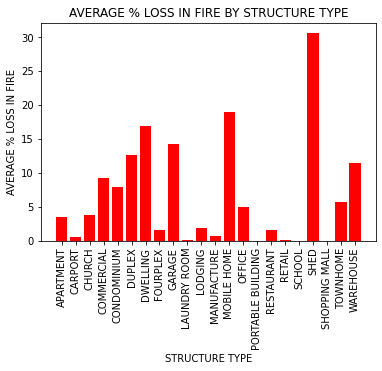

In [41]:
unique_structure=cleaned_structure_loss['STRUCTURE TYPE'].unique()
unique_structure.sort()
#print(unique_structure)

x_axis = unique_structure
y_axis = avg_loss_structure
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['red'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("AVERAGE % LOSS IN FIRE")
plt.title("AVERAGE % LOSS IN FIRE BY STRUCTURE TYPE")

#plt.tight_layout()

plt.show()

***Merge All Residential Buildings=RESIDENTIAL and Structures <1%=OTHER***

In [42]:
#clean up new structure types to consolidate "like" names
new_structure_loss = cleaned_structure_loss.replace({
     "APARTMENT":"RESIDENTIAL",
     "APARTMENTS":"RESIDENTIAL",     
     "APARTMENTS (ROOF TOP)":"RESIDENTIAL",
    
     "DUPLEX":"RESIDENTIAL",
    
     "DWELLING":"RESIDENTIAL",
                          
     "CONDO":"RESIDENTIAL",
     "CONDOMINIUM":"RESIDENTIAL",
     "CONDOMINIUMS":"RESIDENTIAL",
     "CONDOMINUM":"RESIDENTIAL",

     "DWELLING":"RESIDENTIAL", 
     "DWELLING (WINDOW)":"RESIDENTIAL",
    
     "FOURPLEX":"RESIDENTIAL",
    
     "MANUFACTURE":"RESIDENTIAL",
     "MANUFACTURING":"RESIDENTIAL",
    
     "MOBILE HOME":"RESIDENTIAL",
    
     "TOWNHOME":"RESIDENTIAL",
    
     "CARPORT":"OTHER",               
     "LAUNDRY ROOM":"OTHER",         
     "MANUFACTURE":"OTHER",
     "PORTABLE BUILDING":"OTHER",      
     "RETAIL":"OTHER",               
     "SCHOOL":"OTHER",                
     "SHOPPING MALL":"OTHER"
       
    })
new_structure_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,RESIDENTIAL,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,RESIDENTIAL,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,RESIDENTIAL,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,RESIDENTIAL,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,RESIDENTIAL,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


***New Total Number of Unique Structure Types***

In [43]:
total_loss_structure = new_structure_loss.groupby(["STRUCTURE TYPE"]).count()["PERCENTAGE LOSS"]

total_loss_structure

STRUCTURE TYPE
CHURCH           2
COMMERCIAL      68
GARAGE          12
LODGING         12
OFFICE           3
OTHER           10
RESIDENTIAL    488
RESTAURANT       5
SHED            13
WAREHOUSE        8
Name: PERCENTAGE LOSS, dtype: int64

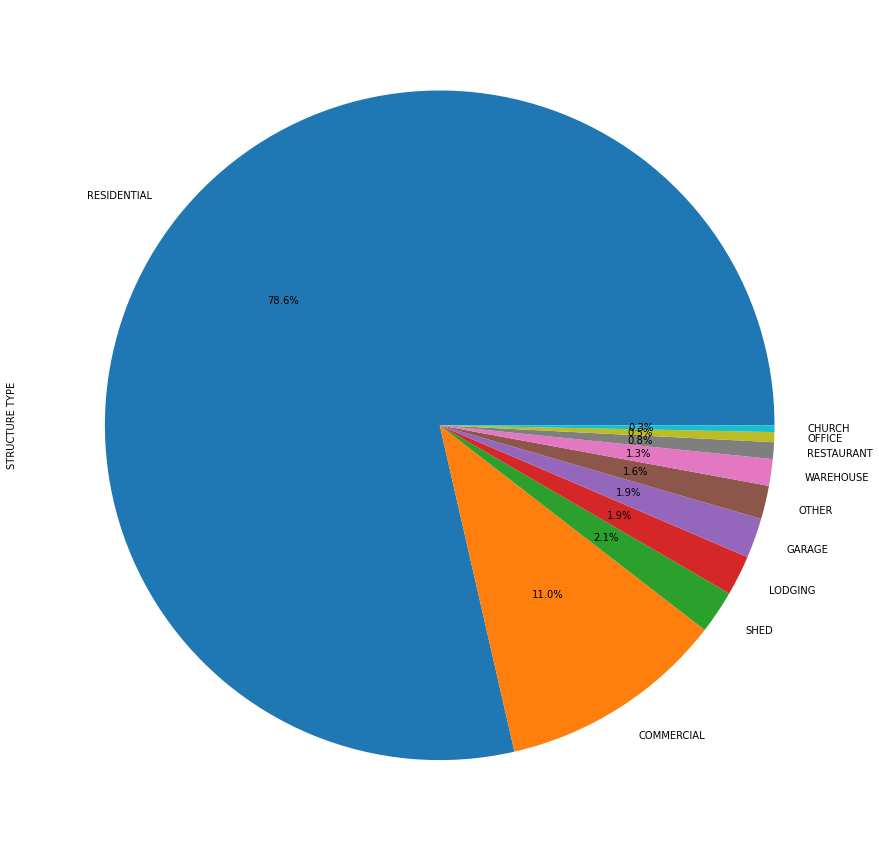

In [44]:
fire_type = new_structure_loss['STRUCTURE TYPE'].value_counts()

fig = plt.figure(figsize=(15,30))
fire_type.plot(kind="pie",autopct="%1.1f%%")

plt.xticks(rotation=90)
plt.show()

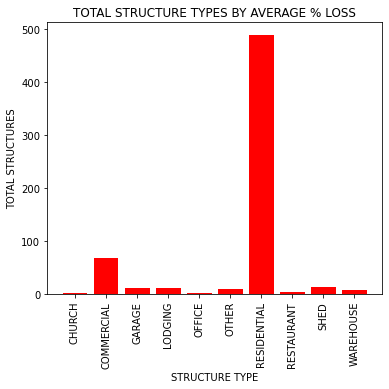

In [45]:
unique_structure=new_structure_loss['STRUCTURE TYPE'].unique()
unique_structure.sort()
#print(unique_structure)

x_axis = unique_structure
y_axis = total_loss_structure
plt.figure(figsize=(6,5))
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['red'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("TOTAL STRUCTURES")
plt.title("TOTAL STRUCTURE TYPES BY AVERAGE % LOSS")

#plt.tight_layout()
plt.show()

*OTHER = CARPORT, LAUNDRY ROOM, MANUFACTURE, PORTABLE BUILDING, RETAIL, SCHOOL, SHOPPING MALL*

***New Average Percentage Loss per Structure after Final Merges***

In [46]:
percent_loss_structure = new_structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

percent_loss_structure

STRUCTURE TYPE
CHURCH          3.750000
COMMERCIAL      9.191324
GARAGE         14.255000
LODGING         1.840000
OFFICE          5.000000
OTHER           0.199000
RESIDENTIAL    11.270205
RESTAURANT      1.502000
SHED           30.586154
WAREHOUSE      11.431250
Name: PERCENTAGE LOSS, dtype: float64

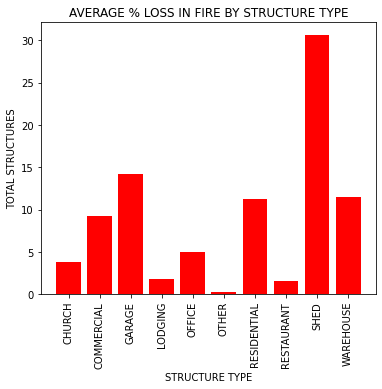

In [47]:
unique_structure=new_structure_loss['STRUCTURE TYPE'].unique()
unique_structure.sort()
#print(unique_structure)

x_axis = unique_structure
y_axis = percent_loss_structure
plt.figure(figsize=(6,5))
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['red'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("TOTAL STRUCTURES")
plt.title("AVERAGE % LOSS IN FIRE BY STRUCTURE TYPE")

#plt.tight_layout()
plt.show()

*OTHER = CARPORT, LAUNDRY ROOM, MANUFACTURE, PORTABLE BUILDING, RETAIL, SCHOOL, SHOPPING MALL*

***Heatmap of AVG Percent Loss of Structure Type***

In [48]:
# Configure gmaps.
gmaps.configure(api_key=gkey)

In [49]:
lat_for_map=new_structure_loss['Lat'].astype(float)
lat_for_map.astype(float)

lng_for_map=new_structure_loss['Lng'].astype(float)
lng_for_map.astype(float)

0     -96.814783
1     -96.857108
2     -96.824020
3     -96.764435
4     -96.908816
         ...    
616   -96.694285
617   -96.765385
618   -96.726209
619   -96.567056
620   -96.802091
Name: Lng, Length: 621, dtype: float64

In [50]:
# Use the Lat and Lng as locations and Percentage Loss as the weight.
locations = new_structure_loss[["Lat", "Lng"]]
structure_type_pct_loss = new_structure_loss["PERCENTAGE LOSS"].astype(float)

In [51]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '450px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [66]:
# Add Heatmap layer to map.
fig = gmaps.figure(layout=figure_layout, map_type="TERRAIN", center=(32.83, -96.75), zoom_level=10)

heat_layer = gmaps.heatmap_layer(locations, weights=structure_type_pct_loss, 
                                 dissipating=False, max_intensity=200, 
                                 point_radius=0.02)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…

In [53]:
info_box_template = """
<dl>
<dt>Structure Type</dt><dd>{STRUCTURE TYPE}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
structure_info = [info_box_template.format(**row) for index, row in new_structure_loss.iterrows()]
locations = new_structure_loss[["Lat", "Lng"]]

In [54]:
# Customize the size of the figure
figure_layout = {
    'width': '500px',
    'height': '550px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [55]:
fires_df=new_structure_loss[['Lat','Lng']]
fires_layer=gmaps.symbol_layer(fires_df,fill_color=(255,165,0),stroke_color=(0,0,0),scale=2)
fig=gmaps.figure(layout=figure_layout, center=(32.83, -96.74), zoom_level=10)
fig.add_layer(fires_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…

In [67]:
heat_layer = gmaps.heatmap_layer(locations, weights=structure_type_pct_loss, 
                                 dissipating=False, max_intensity=200, 
                                 point_radius=0.02)

marker_layer=gmaps.symbol_layer(fires_df,fill_color=(255,165,0),stroke_color=(0,0,0),scale=2)

# Display figure
fig = gmaps.figure()
fig = gmaps.figure(layout=figure_layout, map_type="TERRAIN", center=(32.83, -96.74), zoom_level=10)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…

In [57]:
structure_df = new_structure_loss.set_index('STRUCTURE TYPE')

structure_df.loc['CHURCH']

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,BUILDING STORIES,CONSTRUCTION,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
STRUCTURE TYPE,,,,,,,,,,,,,,,,,,,,,
CHURCH,38,17288.0,11/11/2019,07:25 PM,75212.0,9,B,6.0,1.0,BRICK,...,200000.0,0.0,0.0,200000.0,0.0,NO,UNK,3727 N WESTMORELAND RD,32.787826,-96.87427
CHURCH,209,17667.0,01/08/2020,12:55 AM,75218.0,4,B,9.0,1.0,NaN,...,400000.0,-30000.0,0.0,370000.0,7.5,UNK,YES,1000 EASTON RD,32.847031,-96.69489


In [58]:
# Customize the size of the figure
figure_layout = {
    'width': '500px',
    'height': '550px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [64]:
structure_df = new_structure_loss.set_index('STRUCTURE TYPE')

structure_church=structure_df.loc['CHURCH']
structure_layer_1=structure_church[['Lat','Lng']]

structure_commercial=structure_df.loc['COMMERCIAL']
structure_layer_2=structure_commercial[['Lat','Lng']]

structure_garage=structure_df.loc['GARAGE']
structure_layer_3=structure_garage[['Lat','Lng']]

structure_lodging=structure_df.loc['LODGING']
structure_layer_4=structure_lodging[['Lat','Lng']]

structure_office=structure_df.loc['OFFICE']
structure_layer_5=structure_office[['Lat','Lng']]

structure_other=structure_df.loc['OTHER']
structure_layer_6=structure_other[['Lat','Lng']]

structure_residential=structure_df.loc['RESIDENTIAL']
structure_layer_7=structure_residential[['Lat','Lng']]

structure_restaurant=structure_df.loc['RESTAURANT']
structure_layer_8=structure_restaurant[['Lat','Lng']]

structure_shed=structure_df.loc['SHED']
structure_layer_9=structure_shed[['Lat','Lng']]

structure_warehouse=structure_df.loc['WAREHOUSE']
structure_layer_10=structure_warehouse[['Lat','Lng']]

layer_1=gmaps.symbol_layer(structure_layer_1,fill_color=(0,255,0),stroke_color=(0,255,0),scale=4)    #GREEN
layer_2=gmaps.symbol_layer(structure_layer_2,fill_color=(0,0,254),stroke_color=(0,0,254),scale=2)    #BLUE
layer_3=gmaps.symbol_layer(structure_layer_3,fill_color=(255,0,0),stroke_color=(255,0,0),scale=2)    #RED
layer_4=gmaps.symbol_layer(structure_layer_4,fill_color=(255,165,0),stroke_color=(255,165,0),scale=3)  #ORANGE
layer_5=gmaps.symbol_layer(structure_layer_5,fill_color=(255,105,180),stroke_color=(255,105,180),scale=3)   #PINK
layer_6=gmaps.symbol_layer(structure_layer_6,fill_color=(0,255,255),stroke_color=(0,255,255),scale=3)     #aqua
layer_7=gmaps.symbol_layer(structure_layer_7,fill_color=(153,50,204),stroke_color=(153,50,204),scale=2)   #darkorchid
layer_8=gmaps.symbol_layer(structure_layer_8,fill_color=(150,75,0),stroke_color=(150,75,0),scale=3)    #BROWN
layer_9=gmaps.symbol_layer(structure_layer_9,fill_color=(128,128,128),stroke_color=(128,128,128),scale=2)    #GREY
layer_10=gmaps.symbol_layer(structure_layer_10,fill_color=(255,255,0),stroke_color=(255,255,0),scale=3)    #yellow1

fig=gmaps.figure(layout=figure_layout, map_type="TERRAIN", center=(32.83, -96.74), zoom_level=10)
fig.add_layer(heat_layer)
fig.add_layer(layer_1)
fig.add_layer(layer_2)
fig.add_layer(layer_3)
fig.add_layer(layer_4)
fig.add_layer(layer_5)
fig.add_layer(layer_6)
fig.add_layer(layer_7)
fig.add_layer(layer_8)
fig.add_layer(layer_9)
fig.add_layer(layer_10)
fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…